<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/Accuracy%20by%20Epoch%20RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest (RF)
**By. Sk. Tanzir Mehedi**

Lecturer, Department of IT, UITS, Bangladesh

****Importing libraries****

In [ ]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tensorflow.keras.callbacks import TensorBoard
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

**Upload File**

In [ ]:
#uploaded = files.upload()

Saving New_Combined_IoT_dataset.csv to New_Combined_IoT_dataset.csv


**Importing the Dataset**

In [ ]:
dataset=pd.read_csv('/content/Preprocessed_data_weather_details.csv')

**Exploratory Data Analysis**

In [ ]:
dataset.head()

,outlook,temperature,humidity,windy,label
0,1.0,1.000000,0.65625,0,0
1,1.0,0.761905,0.81250,1,0
2,0.0,0.904762,0.59375,0,1
3,0.5,0.285714,1.00000,0,1
4,0.5,0.190476,0.50000,0,1


In [ ]:
print(dataset.shape)

(14, 5)


In [ ]:
print(list(dataset.columns))

['outlook', 'temperature', 'humidity', 'windy', 'label']


In [ ]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [ ]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['outlook', 'temperature', 'humidity', 'windy']

**Split Dataset**

In [ ]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [ ]:
X.head()

,outlook,temperature,humidity,windy
0,1.0,1.000000,0.65625,0
1,1.0,0.761905,0.81250,1
2,0.0,0.904762,0.59375,0
3,0.5,0.285714,1.00000,0
4,0.5,0.190476,0.50000,0


In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: label, dtype: int64

**Splitting Data**

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (9, 4)
X_test shape  is :  (5, 4)
y_train shape is :  (9,)
y_test shape is  :  (5,)


**Building Decision Tree Model**

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

Epoch :  0 Train Score :  1.0 Test Score :  0.6
Epoch :  1 Train Score :  1.0 Test Score :  0.8
Epoch :  2 Train Score :  1.0 Test Score :  0.4
Epoch :  3 Train Score :  1.0 Test Score :  0.6
Epoch :  4 Train Score :  1.0 Test Score :  0.6
Epoch :  5 Train Score :  1.0 Test Score :  0.4
Epoch :  6 Train Score :  1.0 Test Score :  0.4
Epoch :  7 Train Score :  1.0 Test Score :  0.8
Epoch :  8 Train Score :  1.0 Test Score :  0.6
Epoch :  9 Train Score :  1.0 Test Score :  0.4
Epoch :  10 Train Score :  1.0 Test Score :  0.6
Epoch :  11 Train Score :  1.0 Test Score :  0.6
Epoch :  12 Train Score :  1.0 Test Score :  0.4
Epoch :  13 Train Score :  1.0 Test Score :  0.6
Epoch :  14 Train Score :  1.0 Test Score :  0.6
Epoch :  15 Train Score :  1.0 Test Score :  0.8
Epoch :  16 Train Score :  1.0 Test Score :  0.6
Epoch :  17 Train Score :  1.0 Test Score :  0.4
Epoch :  18 Train Score :  1.0 Test Score :  0.8
Epoch :  19 Train Score :  1.0 Test Score :  0.4
Epoch :  20 Train Score :  1.0

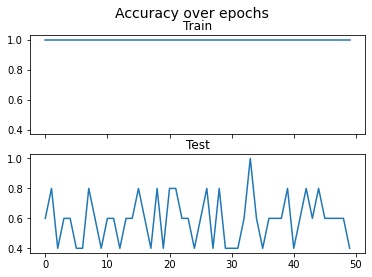

In [ ]:
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 50
N_BATCH = 3

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    mini_batch_index = 0
    while True:
        clf.fit(X_train, y_train)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break


    tr = clf.score(X_train, y_train)
    te = clf.score(X_test, y_test)

    print('Epoch : ', epoch, 'Train Score : ', tr, 'Test Score : ', te)

    # Append SCORE TRAIN
    scores_train.append(tr)
    # Append SCORE TEST
    scores_test.append(te)

    epoch += 1

""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

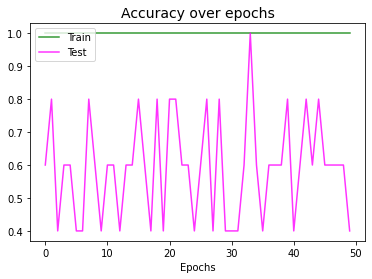

In [ ]:
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1 0]
 [3 1]]
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.4
Precision: 1.0
Recall: 0.25
F1 Score: 0.4
Mean Absolute Error: 0.6
Cohens kappa: 0.11764705882352955
ROC AUC: 0.625
Train Time(s):  0.25152144599996973
Test Time(s):  0.018750989000011486


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

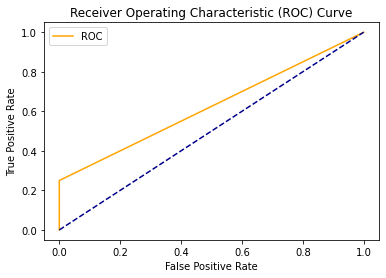

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-RF_Result.csv')

**Finding Important Features in Scikit-learn**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

temperature    0.293983
humidity       0.272258
windy          0.231869
outlook        0.201889
dtype: float64

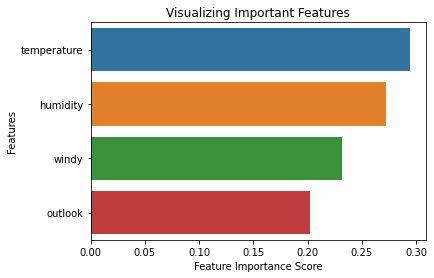

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**Generating the Model on Selected Features**

In [ ]:
# Split dataset into features and labels
X = dataset.drop(['label','outlook'], axis=1) # New Features
y=dataset['label']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [ ]:
print(X.shape)

(14, 3)


In [ ]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.6
Precision: 0.6
Recall: 1.0
F1 Score: 0.7499999999999999
Mean Absolute Error: 0.4
Mean Absolute Error: 0.4
Cohens kappa: 0.0
Train Time(s):  0.13200537000000168
Test Time(s):  0.018119204000015543
